In [1]:
import pandas as pd
import ast
import seaborn as sns
from collections import Counter

from matplotlib import pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_seq_items = 2000


In [2]:
df_oct = pd.read_csv('Michelin_restaurants_Oct2023.csv')
df_nov = pd.read_csv('Michelin_restaurants_Nov2023.csv')

In [3]:
df_oct.head(2)
df_nov.head(2)
len(df_oct), len(df_nov)

#ast.literal_eval(df.iloc[0]['json_data'])

,chef,city,country,cuisine_code,json_data,lat,lon,name,price_category,region,res_id,stars
0,Franco Caffara,Como,IT,"[{'code': 'TYC_1085', 'label': 'Modern Cuisine...","{'_geoloc': {'lat': 45.8133698, 'lng': 9.0825}...",45.813370,9.082500,I Tigli in Theoria,luxury,Lombardy,71097,ONE_STAR
1,Andrea Casali,Como,IT,"[{'code': 'TYC_814', 'label': 'Italian Contemp...","{'_geoloc': {'lat': 45.8334043, 'lng': 9.07156...",45.833404,9.071568,Kitchen,premium,Lombardy,70596,ONE_STAR


,chef,city,country,cuisine_code,json_data,lat,lon,name,price_category,region,res_id,stars
0,Mauro Angelo Elli,Albavilla,IT,"[{'code': 'TYC_1085', 'label': 'Modern Cuisine...","{'_geoloc': {'lat': 45.8042803, 'lng': 9.18916...",45.804280,9.189167,Il Cantuccio,premium,Lombardy,88352,ONE_STAR
1,NaN,Lomazzo,IT,"[{'code': 'TYC_814', 'label': 'Italian Contemp...","{'_geoloc': {'lat': 45.6967845, 'lng': 9.03429...",45.696784,9.034291,Trattoria Contemporanea,premium,Lombardy,88938,ONE_STAR


(3453, 3482)

In [4]:
df = df_nov.copy()

In [5]:
set(df['stars'])

{'ONE_STAR', 'THREE_STARS', 'TWO_STARS'}

In [6]:
l = ast.literal_eval(df.iloc[100]['cuisine_code'])

l

[{'code': 'TYC_1036', 'label': 'Creative', 'slug': 'creative'},
 {'code': 'TYC_6', 'label': 'Contemporary', 'slug': 'contemporary'}]

In [7]:
df_tmp = df.groupby('country').count().reset_index().sort_values('res_id', ascending=False)[['country', 'res_id']]
df_tmp.head(7)
len(df_tmp)

,country,res_id
15,FR,621
24,JP,411
23,IT,395
10,DE,325
13,ES,245
40,US,231
16,GB,187


42

In [17]:
df_tmp = df_oct.groupby('country').count().reset_index().sort_values('res_id', ascending=False)[['country', 'res_id']]
df_tmp.head(7)
len(df_tmp)

,country,res_id
15,FR,622
24,JP,411
23,IT,377
10,DE,327
13,ES,246
40,US,225
16,GB,187


42

In [16]:
df['country'].nunique()

42

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='country', ylabel='res_id'>

Text(0.5, 1.0, 'Number of restaurants per country')

Text(0, 0.5, 'Count of restaurants')

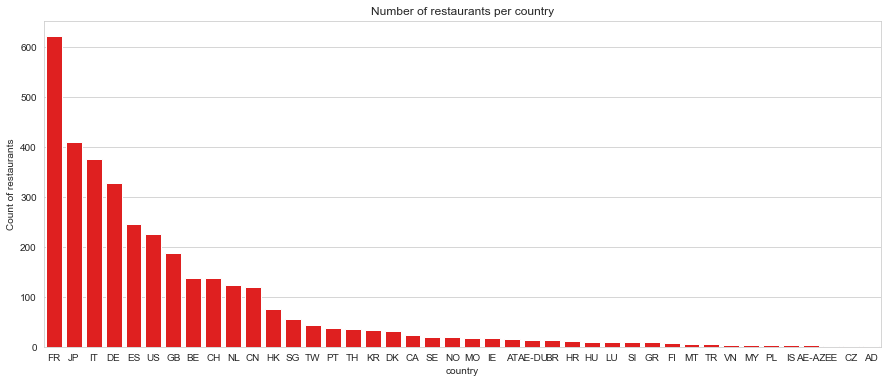

In [19]:
plt.figure(figsize=(15,6))

sns.set_style("whitegrid")
sns.barplot(df_tmp, x='country', y='res_id', color='red')

plt.title('Number of restaurants per country')
plt.ylabel('Count of restaurants')

In [20]:
df_tmp = df.groupby(['country', 'stars']).count().sort_values('res_id', ascending=False)['res_id'].reset_index()

In [21]:
df_tmp = df_tmp.pivot(columns=['country', 'stars'])

In [22]:
df_tmp

res_id                                                        \
country       FR       IT       JP       DE       ES       US       GB   
stars   ONE_STAR ONE_STAR ONE_STAR ONE_STAR ONE_STAR ONE_STAR ONE_STAR   
0          521.0      NaN      NaN      NaN      NaN      NaN      NaN   
1            NaN    342.0      NaN      NaN      NaN      NaN      NaN   
2            NaN      NaN    319.0      NaN      NaN      NaN      NaN   
3            NaN      NaN      NaN    268.0      NaN      NaN      NaN   
4            NaN      NaN      NaN      NaN    198.0      NaN      NaN   
..           ...      ...      ...      ...      ...      ...      ...   
93           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
94           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
95           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
96           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
97           NaN      NaN      NaN      NaN      NaN      NaN      NaN   

                                    ...                                 \
country       BE       CH       CN  ...        SI                   EE   
stars   ONE_STAR ONE_STAR ONE_STAR  ... TWO_STARS THREE_STARS ONE_STAR   
0            NaN      NaN      NaN  ...       NaN         NaN      NaN   
1            NaN      NaN      NaN  ...       NaN         NaN      NaN   
2            NaN      NaN      NaN  ...       NaN         NaN      NaN   
3            NaN      NaN      NaN  ...       NaN         NaN      NaN   
4            NaN      NaN      NaN  ...       NaN         NaN      NaN   
..           ...      ...      ...  ...       ...         ...      ...   
93           NaN      NaN      NaN  ...       NaN         NaN      NaN   
94           NaN      NaN      NaN  ...       NaN         NaN      NaN   
95           NaN      NaN      NaN  ...       NaN         NaN      NaN   
96           NaN      NaN      NaN  ...       NaN         NaN      NaN   
97           NaN      NaN      NaN  ...       NaN         NaN      NaN   

                                                                                
country                  MY        FI        NO          SE        GR       AD  
stars   TWO_STARS TWO_STARS TWO_STARS TWO_STARS THREE_STARS TWO_STARS ONE_STAR  
0             NaN       NaN       NaN       NaN         NaN       NaN      NaN  
1             NaN       NaN       NaN       NaN         NaN       NaN      NaN  
2             NaN       NaN       NaN       NaN         NaN       NaN      NaN  
3             NaN       NaN       NaN       NaN         NaN       NaN      NaN  
4             NaN       NaN       NaN       NaN         NaN       NaN      NaN  
..            ...       ...       ...       ...         ...       ...      ...  
93            NaN       NaN       1.0       NaN         NaN       NaN      NaN  
94            NaN       NaN       NaN       1.0         NaN       NaN      NaN  
95            NaN       NaN       NaN       NaN         1.0       NaN      NaN  
96            NaN       NaN       NaN       NaN         NaN       1.0      NaN  
97            NaN       NaN       NaN       NaN         NaN       NaN      1.0  

[98 rows x 98 columns]

In [23]:
df[df.country=='US'].groupby('stars').count()

,chef,city,country,cuisine_code,json_data,lat,lon,name,price_category,region,res_id
stars,,,,,,,,,,,
ONE_STAR,104,185,185,185,185,185,185,185,185,185,185
THREE_STARS,12,13,13,13,13,13,13,13,13,13,13
TWO_STARS,29,33,33,33,33,33,33,33,33,33,33


In [24]:
for index, row in df.head(20).iterrows():
    print(row['name'], row['city'], row.cuisine_code)

Il Cantuccio Albavilla [{'code': 'TYC_1085', 'label': 'Modern Cuisine', 'slug': 'modern-cuisine'}]
Trattoria Contemporanea Lomazzo [{'code': 'TYC_814', 'label': 'Italian Contemporary', 'slug': 'italian-contemporary'}, {'code': 'TYC_1036', 'label': 'Creative', 'slug': 'creative'}]
Kitchen Como [{'code': 'TYC_814', 'label': 'Italian Contemporary', 'slug': 'italian-contemporary'}]
Materia Cernobbio [{'code': 'TYC_1036', 'label': 'Creative', 'slug': 'creative'}]
Il Sereno Al Lago Torno [{'code': 'TYC_1036', 'label': 'Creative', 'slug': 'creative'}]
sui generis. Saronno [{'code': 'TYC_1036', 'label': 'Creative', 'slug': 'creative'}]
Osteria Enoteca Cuntitt Castel San Pietro [{'code': 'TYC_814', 'label': 'Italian Contemporary', 'slug': 'italian-contemporary'}, {'code': 'TYC_1250', 'label': 'Seasonal Cuisine', 'slug': 'seasonal-cuisine'}]
Bianca sul Lago by Emanuele Petrosino Oggiono [{'code': 'TYC_1036', 'label': 'Creative', 'slug': 'creative'}, {'code': 'TYC_1083', 'label': 'Mediterranean C

In [25]:
# cuisine distrib per country

d_cc = {}   # country: [list of cuisines from all restauratns]

for index, row in df.iterrows():
    d_cc[row['country']] = []
    
for index,row in df.iterrows():
    for item in ast.literal_eval(row['cuisine_code']):
        d_cc[row['country']].append(item['label'])
    #d_cc[row['country']].append(ast.literal_eval(row['cuisine_code']))

In [26]:
item

{'code': 'TYC_1085', 'label': 'Modern Cuisine', 'slug': 'modern-cuisine'}

In [27]:
d_cc['JP'][:10]
len(d_cc['IT'])

['Italian',
 'French',
 'Japanese',
 'Japanese',
 'Chinese',
 'French',
 'Japanese',
 'Japanese',
 'Sushi',
 'Japanese']

670

In [28]:
for index, row in df[df.country=='FR'].iterrows():
    if 'Mediterranean Cuisine' in row['cuisine_code']:
        print(row.res_id, row['name'], row['cuisine_code'], '\n')

76426 Ceto [{'code': 'TYC_1096', 'label': 'Seafood', 'slug': 'seafood-1096'}, {'code': 'TYC_1083', 'label': 'Mediterranean Cuisine', 'slug': 'mediterranean-cuisine'}] 

77095 Le Louis XV - Alain Ducasse à l'Hôtel de Paris [{'code': 'TYC_1083', 'label': 'Mediterranean Cuisine', 'slug': 'mediterranean-cuisine'}, {'code': 'TYC_1085', 'label': 'Modern Cuisine', 'slug': 'modern-cuisine'}] 

76674 Hostellerie Jérôme [{'code': 'TYC_1083', 'label': 'Mediterranean Cuisine', 'slug': 'mediterranean-cuisine'}] 

77762 Il Cortile [{'code': 'TYC_1083', 'label': 'Mediterranean Cuisine', 'slug': 'mediterranean-cuisine'}, {'code': 'TYC_1067', 'label': 'Italian', 'slug': 'italian'}] 

76507 Le Saint-Martin [{'code': 'TYC_1085', 'label': 'Modern Cuisine', 'slug': 'modern-cuisine'}, {'code': 'TYC_1083', 'label': 'Mediterranean Cuisine', 'slug': 'mediterranean-cuisine'}] 

77690 Les Pêcheurs [{'code': 'TYC_1083', 'label': 'Mediterranean Cuisine', 'slug': 'mediterranean-cuisine'}] 

77741 Louroc - Hôtel du 

In [151]:
df[df.res_id==88338]['cuisine_code']

64    [{'code': 'TYC_814', 'label': 'Italian Contemp...
Name: cuisine_code, dtype: object

In [30]:
c = Counter(d_cc['US'])

In [31]:
all_cuisines = [item[0] for item in c.most_common()]

In [32]:
c.most_common()[:]

[('Contemporary', 127),
 ('Japanese', 48),
 ('Sushi', 37),
 ('Californian', 24),
 ('American', 22),
 ('French', 17),
 ('Italian', 13),
 ('Korean', 13),
 ('Seafood', 8),
 ('American Contemporary', 8),
 ('Modern Cuisine', 7),
 ('Creative', 7),
 ('Regional Cuisine', 7),
 ('Mexican', 6),
 ('Steakhouse', 6),
 ('Asian', 5),
 ('Fusion', 4),
 ('Middle Eastern', 4),
 ('French Contemporary', 4),
 ('Modern French', 3),
 ('Latin American', 3),
 ('Spanish', 3),
 ('Indian', 3),
 ('Classic Cuisine', 2),
 ('Thai', 2),
 ('Mediterranean Cuisine', 2),
 ('Colombian', 2),
 ('Innovative', 2),
 ('Vegetarian', 2),
 ('Scandinavian', 2),
 ('Traditional Cuisine', 1),
 ('Farm to table', 1),
 ('Chinese', 1),
 ('Asian Contemporary', 1),
 ('Filipino', 1),
 ('Portuguese', 1),
 ('Lebanese', 1),
 ('Peruvian', 1),
 ('Grills', 1),
 ('Classic French', 1),
 ('Italian-American', 1),
 ('Yakitori', 1),
 ('Israeli', 1),
 ('Seasonal Cuisine', 1),
 ('Korean Contemporary', 1),
 ('Vegan', 1),
 ('Alsatian', 1),
 ('Tempura', 1)]

In [208]:
# manually filled based on the above

# Medietrranean Cuisine: could belong to more countries (it is Italy, France)
# Alpine: could be Italy and France
# Traditional Cuisine: generic

l_cuisines_local_france = ['Provençal', 'Regional Cuisine', 'Corsican', 'Modern French', 'French']
l_cuisines_foreign_france = ['Japanese', 'Italian', 'Thai', 'Asian Contemporary', 
                             'Peruvian', 'Mexican', 'Chinese', 'Sushi', 'Greek']

l_cuisines_local_italy = ['Italian Contemporary', 'Piedmontese', 'Campanian', 'Italian', 
                          'Sicilian', 
                          'Regional Cuisine', 'Tuscan', 'Ligurian', 'Emilian', 'Sardininan',
                         'Apulian', 'Calabrian', 'Cuisine from Abruzzo', 'Lombardian', 
                         'Cuisine from the Aosta Valley', 'Venetian', 'Cuisine from Romagna', 
                         'Umbrian', 'Cuisine from the Marches', 'Cuisine from Lazio']
l_cuisines_foreign_italy = ['Japanese', 'Asian Contemporary', 'French', 'Colombian', 
                            'Asian Influences']

l_cuisines_local_japan = ['Japanese','Sushi', 'Tempura', 'Yakitori', 'Soba', 'Ramen',
                         'Fugu / Pufferfish', 'Unagi / Freshwater Eel', 'Shojin',
                         'Sukiyaki', 'Oden']
l_cuisines_foreign_japan= ['Italian', 'Chinese', 'Spanish', 'Spanish Contemporary', 
                          'Italian Contemporary']

l_cuisines_local_germany = ['Regional Cuisine']
l_cuisines_foreign_germany = ['Modern French', 'Classic French', 'French Contemporary', 
                             'Creative French', 'Japanese', 'Asian Influences', 'Italian', 
                              'French', 'Japanese Contemporary', 'Sushi', 'Asian', 'Greek', 
                             'North African', 'Israeli', 'Austrian', 'Russian']

l_cuisines_local_usa = ['Californian', 'American', 'American Contemporary', 
                       'Regional Cuisine', 'Italian-American']
l_cuisines_foreign_usa  = ['Japanese', 'Sushi', 'French', 'Italian', 'Korean', 'Mexican', 'Asian', 
                          'Middle Eastern', 'French Contemporary', 'Modern French', 'Latin American', 
                          'Spanish', 'Indian', 'Thai', 'Mediterranean Cuisine', 'Colombian', 
                          'Scandinavian', 'Chinese', 'Asian Contemporary', 'Filipino', 
                          'Portuguese', 'Lebanese', 'Peruvian', 'Classic French', 'Yakitori', 
                          'Israeli', 'Korean Contemporary', 'Alsatian', 'Tempura']

l_cuisines_local_spain = ['Regional Cuisine', 'Castilian', 'Catalan', 'Andalusian', 'Galician',
                         'Spanish']
l_cuisines_foreign_spain = ['Japanese', 'Mexican', 'French Contemporary', 'Colombian']

In [271]:
# local/non local based on the above for chosen country
# we use all cuisines of a restaurant to check if one of them is classed as local

country= 'US'
l_locals = l_cuisines_local_usa
l_foreign = l_cuisines_foreign_usa

d_split = {}

df_tmp = df[df.country==country].copy()
    
local_c, foreign_c = [], []
for index,row in df_tmp.iterrows():
    
    cuisines = [item['label'] for item in ast.literal_eval(row['cuisine_code'])]
    
    local, foreign = 'else', 'else'
    
    # first check if any local cuisine is present in list - if so, it's local
    # local cuisine trumps the rest 
    for item in cuisines:
        if item in l_locals:
            local=True
            foreign=False
    
    # otherwise, check if any foreign cuisine is present in list, if so, it's foreign
    if local is not True:
        for item in cuisines:
            if item in l_foreign:
                foreign=True
                local=False
                
    # otherwise it'll be a else (Creative, etc)
                
    local_c.append(local)
    foreign_c.append(foreign)

df_tmp['local'] = local_c
df_tmp['foreign'] = foreign_c

In [272]:
len(df_tmp)

231

In [273]:
df_tmp.groupby('local').count()[['chef', 'res_id']]
df_tmp.groupby('foreign').count()[['chef', 'res_id']]

len(df_tmp[(df_tmp.local==True) & (df_tmp.foreign==True)])

df_tmp[(df_tmp.local==True) & (df_tmp.foreign==True)][['res_id', 'cuisine_code']]

,chef,res_id
local,,
False,69,121
True,45,60
else,31,50


,chef,res_id
foreign,,
False,45,60
True,69,121
else,31,50


0

,res_id,cuisine_code


In [243]:
for index, row in df[df.country=='US'].iterrows():
    if row.res_id in [84549, 87611, 89013]:
        print(row.res_id, row['cuisine_code'], '\n')

84549 [{'code': 'TYC_47', 'label': 'Californian', 'slug': 'californian'}, {'code': 'TYC_1067', 'label': 'Italian', 'slug': 'italian'}] 

87611 [{'code': 'TYC_40', 'label': 'American', 'slug': 'american'}, {'code': 'TYC_1049', 'label': 'French', 'slug': 'french'}] 



In [107]:
for index, row in df_tmp.iterrows():
    if row.local:
        print(row.res_id, row['cuisine_code'], '\n')

78332 [{'code': 'TYC_1036', 'label': 'Creative', 'slug': 'creative'}, {'code': 'TYC_1101', 'label': 'Regional Cuisine', 'slug': 'regional-cuisine'}] 

77378 [{'code': 'TYC_1100', 'label': 'Provençal', 'slug': 'provençal'}] 

77786 [{'code': 'TYC_1100', 'label': 'Provençal', 'slug': 'provençal'}] 

77375 [{'code': 'TYC_1100', 'label': 'Provençal', 'slug': 'provençal'}] 

75978 [{'code': 'TYC_1100', 'label': 'Provençal', 'slug': 'provençal'}] 

76407 [{'code': 'TYC_1100', 'label': 'Provençal', 'slug': 'provençal'}] 

77192 [{'code': 'TYC_1100', 'label': 'Provençal', 'slug': 'provençal'}, {'code': 'TYC_1083', 'label': 'Mediterranean Cuisine', 'slug': 'mediterranean-cuisine'}] 

76964 [{'code': 'TYC_1100', 'label': 'Provençal', 'slug': 'provençal'}, {'code': 'TYC_1085', 'label': 'Modern Cuisine', 'slug': 'modern-cuisine'}] 

76080 [{'code': 'TYC_1100', 'label': 'Provençal', 'slug': 'provençal'}] 

77527 [{'code': 'TYC_1085', 'label': 'Modern Cuisine', 'slug': 'modern-cuisine'}, {'code': 'T